In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [2]:
#한글폰트
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 한글 폰트 경로 설정
font_path = 'C:/Windows/Fonts/malgun.ttf'  # 여기서 'malgun.ttf'는 예시로 사용한 것이며, 실제 한글 폰트 파일로 변경해야 합니다.
font_name = fm.FontProperties(fname=font_path).get_name()
plt.rc('font', family=font_name)

In [3]:
import pandas as pd

# Excel 파일 읽기
df = pd.read_csv('C:/Users/82106/Desktop/디지털화의 경제 영향도/데이터/processed_digitalization_data.csv')

df.head()

,Country,id,Year,INCOME,LGDP,FPS,MPS,BBS,IU,DDI,GFCF,TO,Labor,LCPI,LPOP,CONSUM,RD
0,Pays Bas,1,2000,1,10.607994,0.620927,0.675303,0.016325,0.439844,0.39172,0.225702,1.255219,1.27381,4.406078,16.583433,0.364773,0.017898
1,Pays Bas,1,2001,1,10.623448,0.509298,0.685303,0.026325,0.449844,0.26795,0.235702,1.275219,1.28668,4.446796,16.590981,0.369977,0.017961
2,Pays Bas,1,2002,1,10.619236,0.498189,0.695303,0.036325,0.459844,0.29133,0.245702,1.295219,1.30062,4.479143,16.597364,0.372896,0.017454
3,Pays Bas,1,2003,1,10.616073,0.484293,0.705303,0.046325,0.469844,0.31063,0.255702,1.315219,1.29774,4.499847,16.602082,0.382046,0.017839
4,Pays Bas,1,2004,1,10.632253,0.482649,0.715303,0.056325,0.479844,0.34787,0.265702,1.335219,1.30060,4.512404,16.605557,0.374042,0.017890


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2730 entries, 0 to 2729
Data columns (total 17 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Country  2541 non-null   object 
 1   id       2730 non-null   int64  
 2   Year     2730 non-null   int64  
 3   INCOME   2730 non-null   int64  
 4   LGDP     2730 non-null   float64
 5   FPS      2730 non-null   float64
 6   MPS      2730 non-null   float64
 7   BBS      2730 non-null   float64
 8   IU       2730 non-null   float64
 9   DDI      2730 non-null   float64
 10  GFCF     2730 non-null   float64
 11  TO       2730 non-null   float64
 12  Labor    2730 non-null   float64
 13  LCPI     2730 non-null   float64
 14  LPOP     2730 non-null   float64
 15  CONSUM   2730 non-null   float64
 16  RD       2730 non-null   float64
dtypes: float64(13), int64(3), object(1)
memory usage: 362.7+ KB


In [5]:
df.shape

(2730, 17)

In [6]:
df.isna().sum()

Country    189
id           0
Year         0
INCOME       0
LGDP         0
FPS          0
MPS          0
BBS          0
IU           0
DDI          0
GFCF         0
TO           0
Labor        0
LCPI         0
LPOP         0
CONSUM       0
RD           0
dtype: int64

In [7]:
df.describe()

,id,Year,INCOME,LGDP,FPS,MPS,BBS,IU,DDI,GFCF,TO,Labor,LCPI,LPOP,CONSUM,RD
count,2730.000000,2730.00000,2730.000000,2730.000000,2730.000000,2730.000000,2730.000000,2730.000000,2.730000e+03,2730.000000,2730.000000,2730.000000,2730.000000,2730.000000,2730.000000,2730.000000
mean,65.500000,2010.00000,2.084615,8.678145,0.209621,0.817067,0.107746,0.374652,-1.465201e-08,0.245509,0.883384,1.246620,4.583859,16.297923,0.263832,0.007835
std,37.533532,6.05641,1.030757,1.477015,0.191711,0.485352,0.135989,0.303873,1.000000e+00,0.075200,0.562682,0.205700,0.377188,1.688415,0.134054,0.008876
min,1.000000,2000.00000,1.000000,5.555394,0.000000,0.000000,0.000000,0.000000,-1.470730e+00,0.015252,0.195596,0.749380,1.067838,4.066614,0.000000,0.000054
25%,33.000000,2005.00000,1.000000,7.587988,0.042129,0.406741,0.002772,0.075431,-9.076500e-01,0.198568,0.546072,1.125810,4.418716,15.265082,0.168977,0.001792
50%,65.500000,2010.00000,2.000000,8.606205,0.157477,0.873023,0.042837,0.326500,-7.874500e-02,0.234834,0.755584,1.232915,4.605170,16.184073,0.251409,0.004333
75%,98.000000,2015.00000,3.000000,9.900314,0.334364,1.177644,0.192807,0.646969,8.421250e-01,0.280631,1.044083,1.353140,4.754758,17.421507,0.340486,0.010179
max,130.000000,2020.00000,4.000000,11.629978,0.918004,2.916536,1.058074,1.000000,2.968360e+00,0.601562,4.426200,1.767370,7.910338,21.067514,1.651000,0.049408


### 결측치 처리

- Country 결측치의 경우 원본데이터에서 id에 해당하는 나라를 같은 id의 Country 결측값에 직접 입력

In [8]:
df.columns

Index(['Country', 'id', 'Year ', 'INCOME', 'LGDP', 'FPS', 'MPS', 'BBS', 'IU',
       'DDI', 'GFCF', 'TO', 'Labor', 'LCPI', 'LPOP', 'CONSUM', 'RD'],
      dtype='object')

In [10]:
df["LCPI"].fillna(method='ffill', inplace=True)

In [11]:
df.isna().sum()

Country    189
id           0
Year         0
INCOME       0
LGDP         0
FPS          0
MPS          0
BBS          0
IU           0
DDI          0
GFCF         0
TO           0
Labor        0
LCPI         0
LPOP         0
CONSUM       0
RD           0
dtype: int64

### 시각화

In [12]:
num_cols = df.select_dtypes(include = 'number').columns
numeric_cols = [col for col in num_cols if col not in ['Year ', 'id', 'INCOME']]
cat_cols = df.select_dtypes(include = 'object').columns

In [13]:
df.head()

,Country,id,Year,INCOME,LGDP,FPS,MPS,BBS,IU,DDI,GFCF,TO,Labor,LCPI,LPOP,CONSUM,RD
0,Pays Bas,1,2000,1,10.607994,0.620927,0.675303,0.016325,0.439844,0.39172,0.225702,1.255219,1.27381,4.406078,16.583433,0.364773,0.017898
1,Pays Bas,1,2001,1,10.623448,0.509298,0.685303,0.026325,0.449844,0.26795,0.235702,1.275219,1.28668,4.446796,16.590981,0.369977,0.017961
2,Pays Bas,1,2002,1,10.619236,0.498189,0.695303,0.036325,0.459844,0.29133,0.245702,1.295219,1.30062,4.479143,16.597364,0.372896,0.017454
3,Pays Bas,1,2003,1,10.616073,0.484293,0.705303,0.046325,0.469844,0.31063,0.255702,1.315219,1.29774,4.499847,16.602082,0.382046,0.017839
4,Pays Bas,1,2004,1,10.632253,0.482649,0.715303,0.056325,0.479844,0.34787,0.265702,1.335219,1.30060,4.512404,16.605557,0.374042,0.017890


### 각 변수별 시간에 따른 변화 그래프

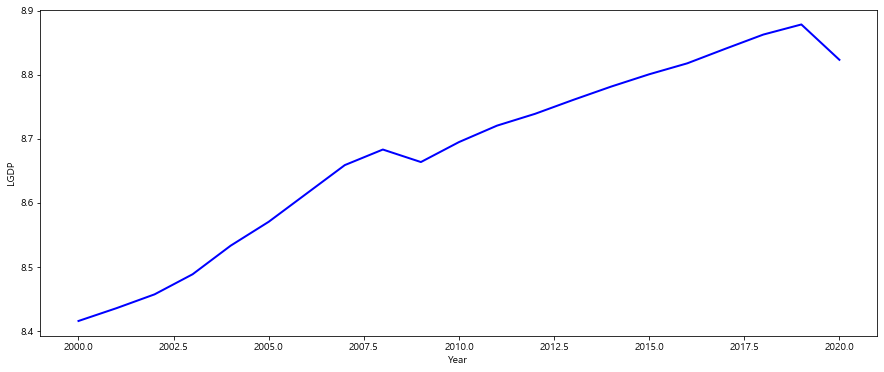

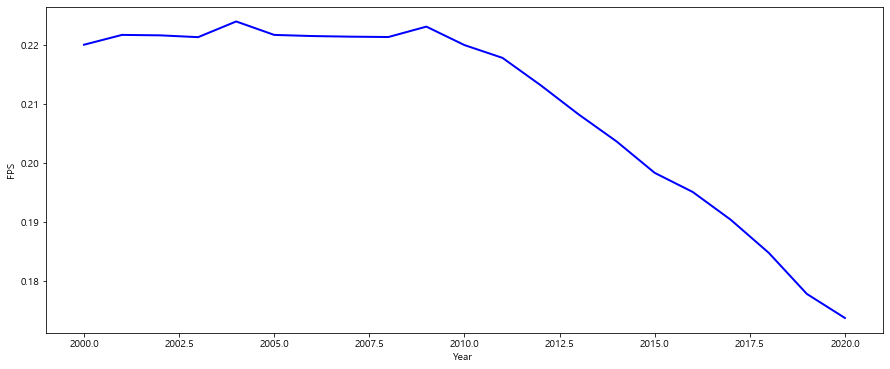

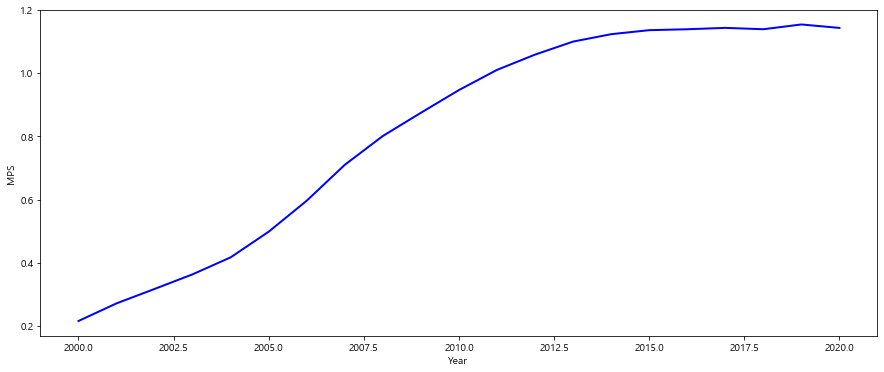

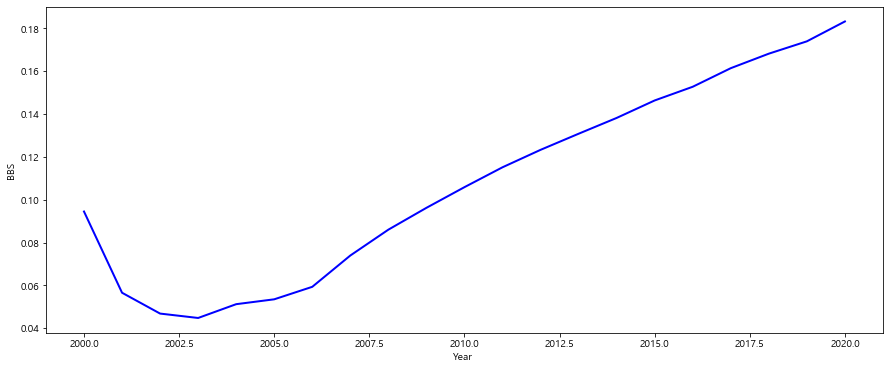

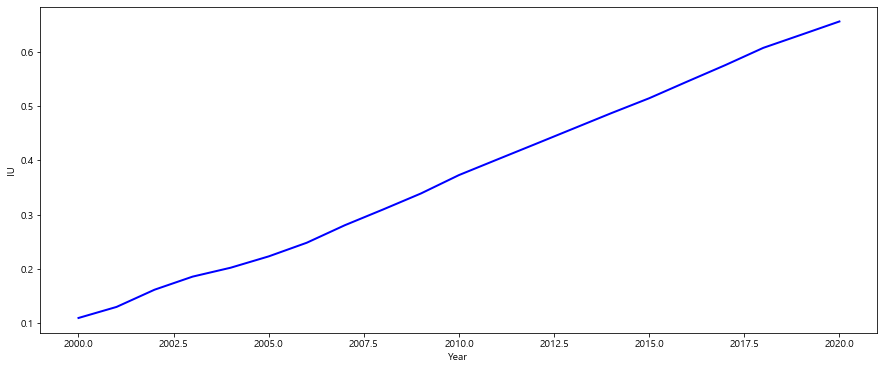

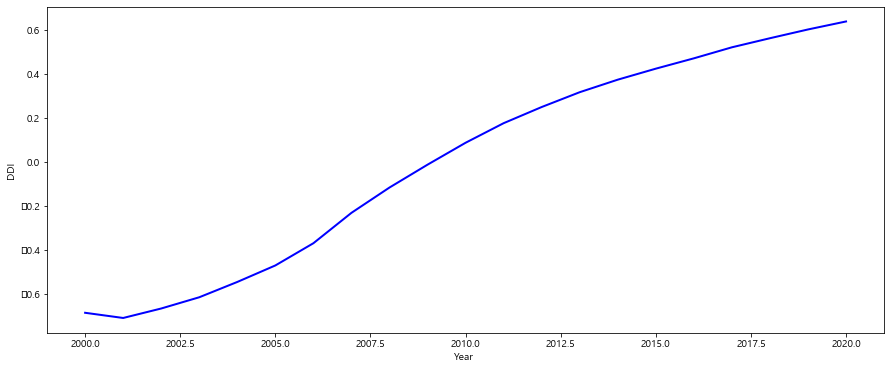

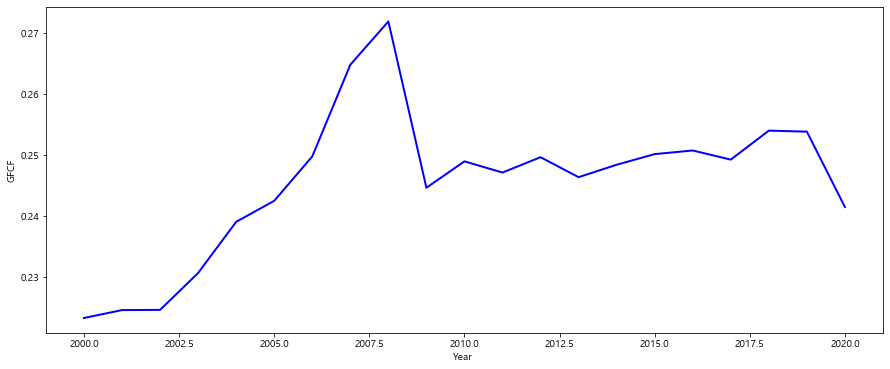

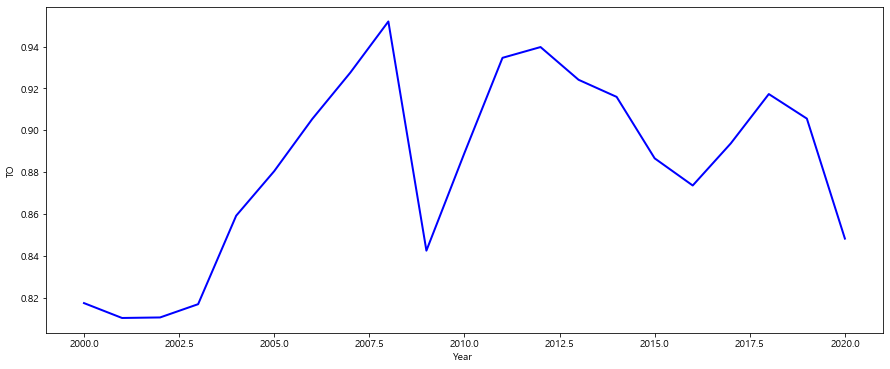

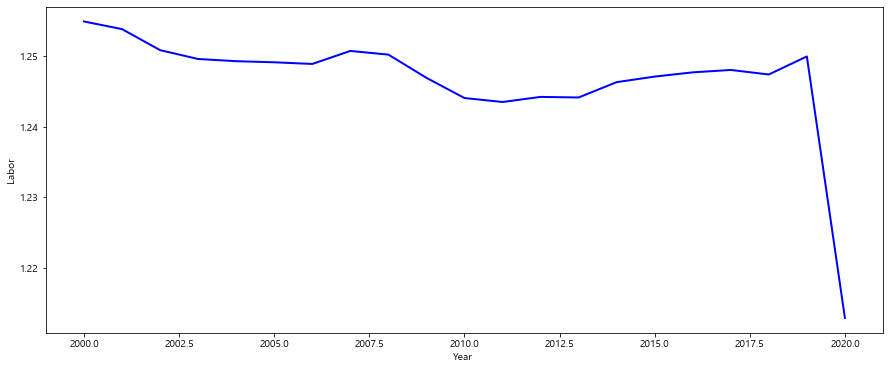

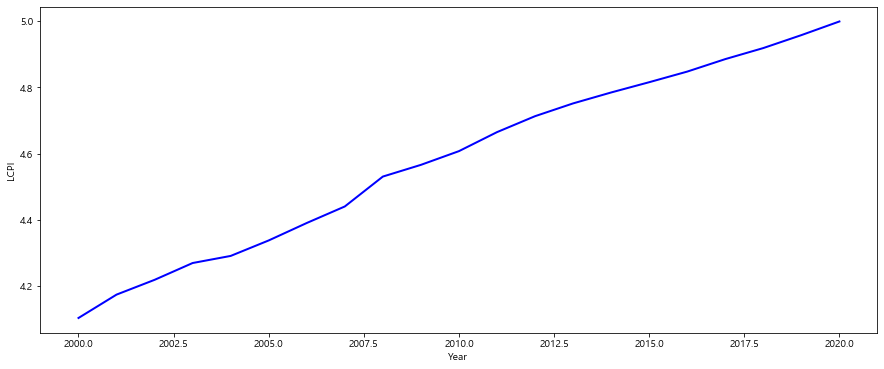

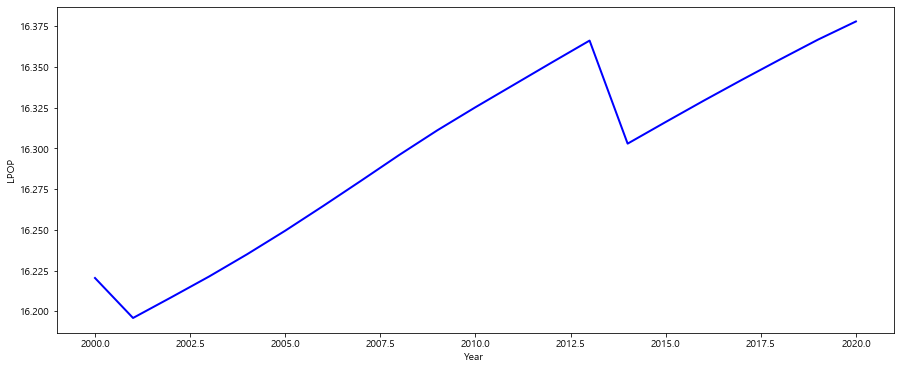

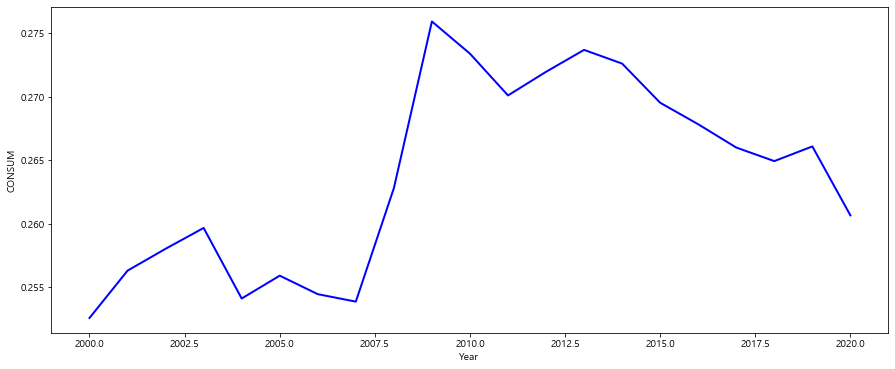

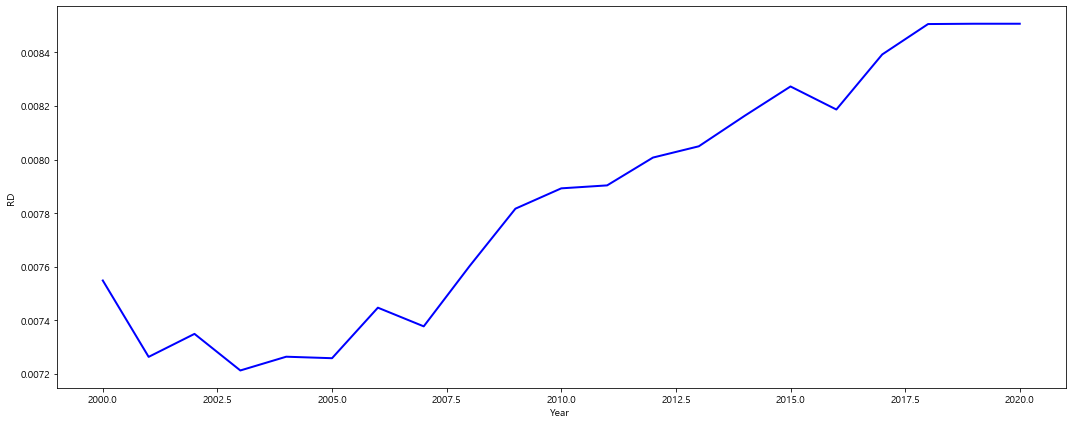

In [14]:
#각 변수별 시계열 트렌드 시각화
for col in numeric_cols:
    # 각 변수마다 새로운 figure 생성
    plt.figure(figsize=(15, 6))
    
    # 연도별 평균값 계산
    yearly_mean = df.groupby('Year ')[col].mean()
    
    # 선 그래프 그리기
    sns.lineplot(data=yearly_mean, color='blue', linewidth=2)

plt.tight_layout()
plt.show()

1. LGDP (로그 GDP)  
- 2000년부터 2020년까지 꾸준히 증가하다 2020년에 소폭 감소함.

2. FPS (유선 전화 가입자 수)  
- 2000년대 초반 정체 후 감소세를 보이며 2020년까지 꾸준히 하락함.

3. MPS (모바일 가입자 수)  
- 2000년 이후 급격히 증가하다가 2015년 이후 증가세가 완만해짐.

4. BBS (브로드밴드 가입자 수)  
- 2000년 초반 낮은 수준에서 시작해 지속적인 증가세를 보임.

5. IU (인터넷 사용률)  
- 2000년부터 꾸준히 상승하여 2020년에는 높은 수준에 도달함.

6. DDI (디지털화 지표)  
- 2000년 이후 지속적으로 증가하며 디지털화 수준이 꾸준히 향상됨.

7. GFCF (고정 자본 형성)  
- 2000년대 후반 급증 후 변동을 거치며 2020년에는 감소세를 보임.

8. TO (무역 개방도)  
- 2000년대 중반 이후 변동폭이 크며 2020년에는 하락세를 기록함.

9. Labor (노동력)  
- 2000년 이후 대체로 안정적인 수준을 유지하다 2020년에 급감함.

10. LCPI (소비자물가지수)  
- 2000년부터 2020년까지 꾸준히 상승, 물가가 지속적으로 상승했음을 반영함.

11. LPOP (Population)  
- 인구는 2000년 이후 꾸준히 증가하였으며, 중간에 약간의 변동을 보임.

12. consum (Government Consumption)  
- 정부 소비는 2007년 급증한 후 감소세로 전환되었으며, 2020년까지 점진적으로 하락함.

13. RD (Research and Development)  
- 연구개발비는 2000년대 초반 정체를 보이다 2007년 이후 지속적으로 증가하여 2020년 고점을 기록함.

### 고소득, 저소득 국가별 시계열 변화 비교 그래프

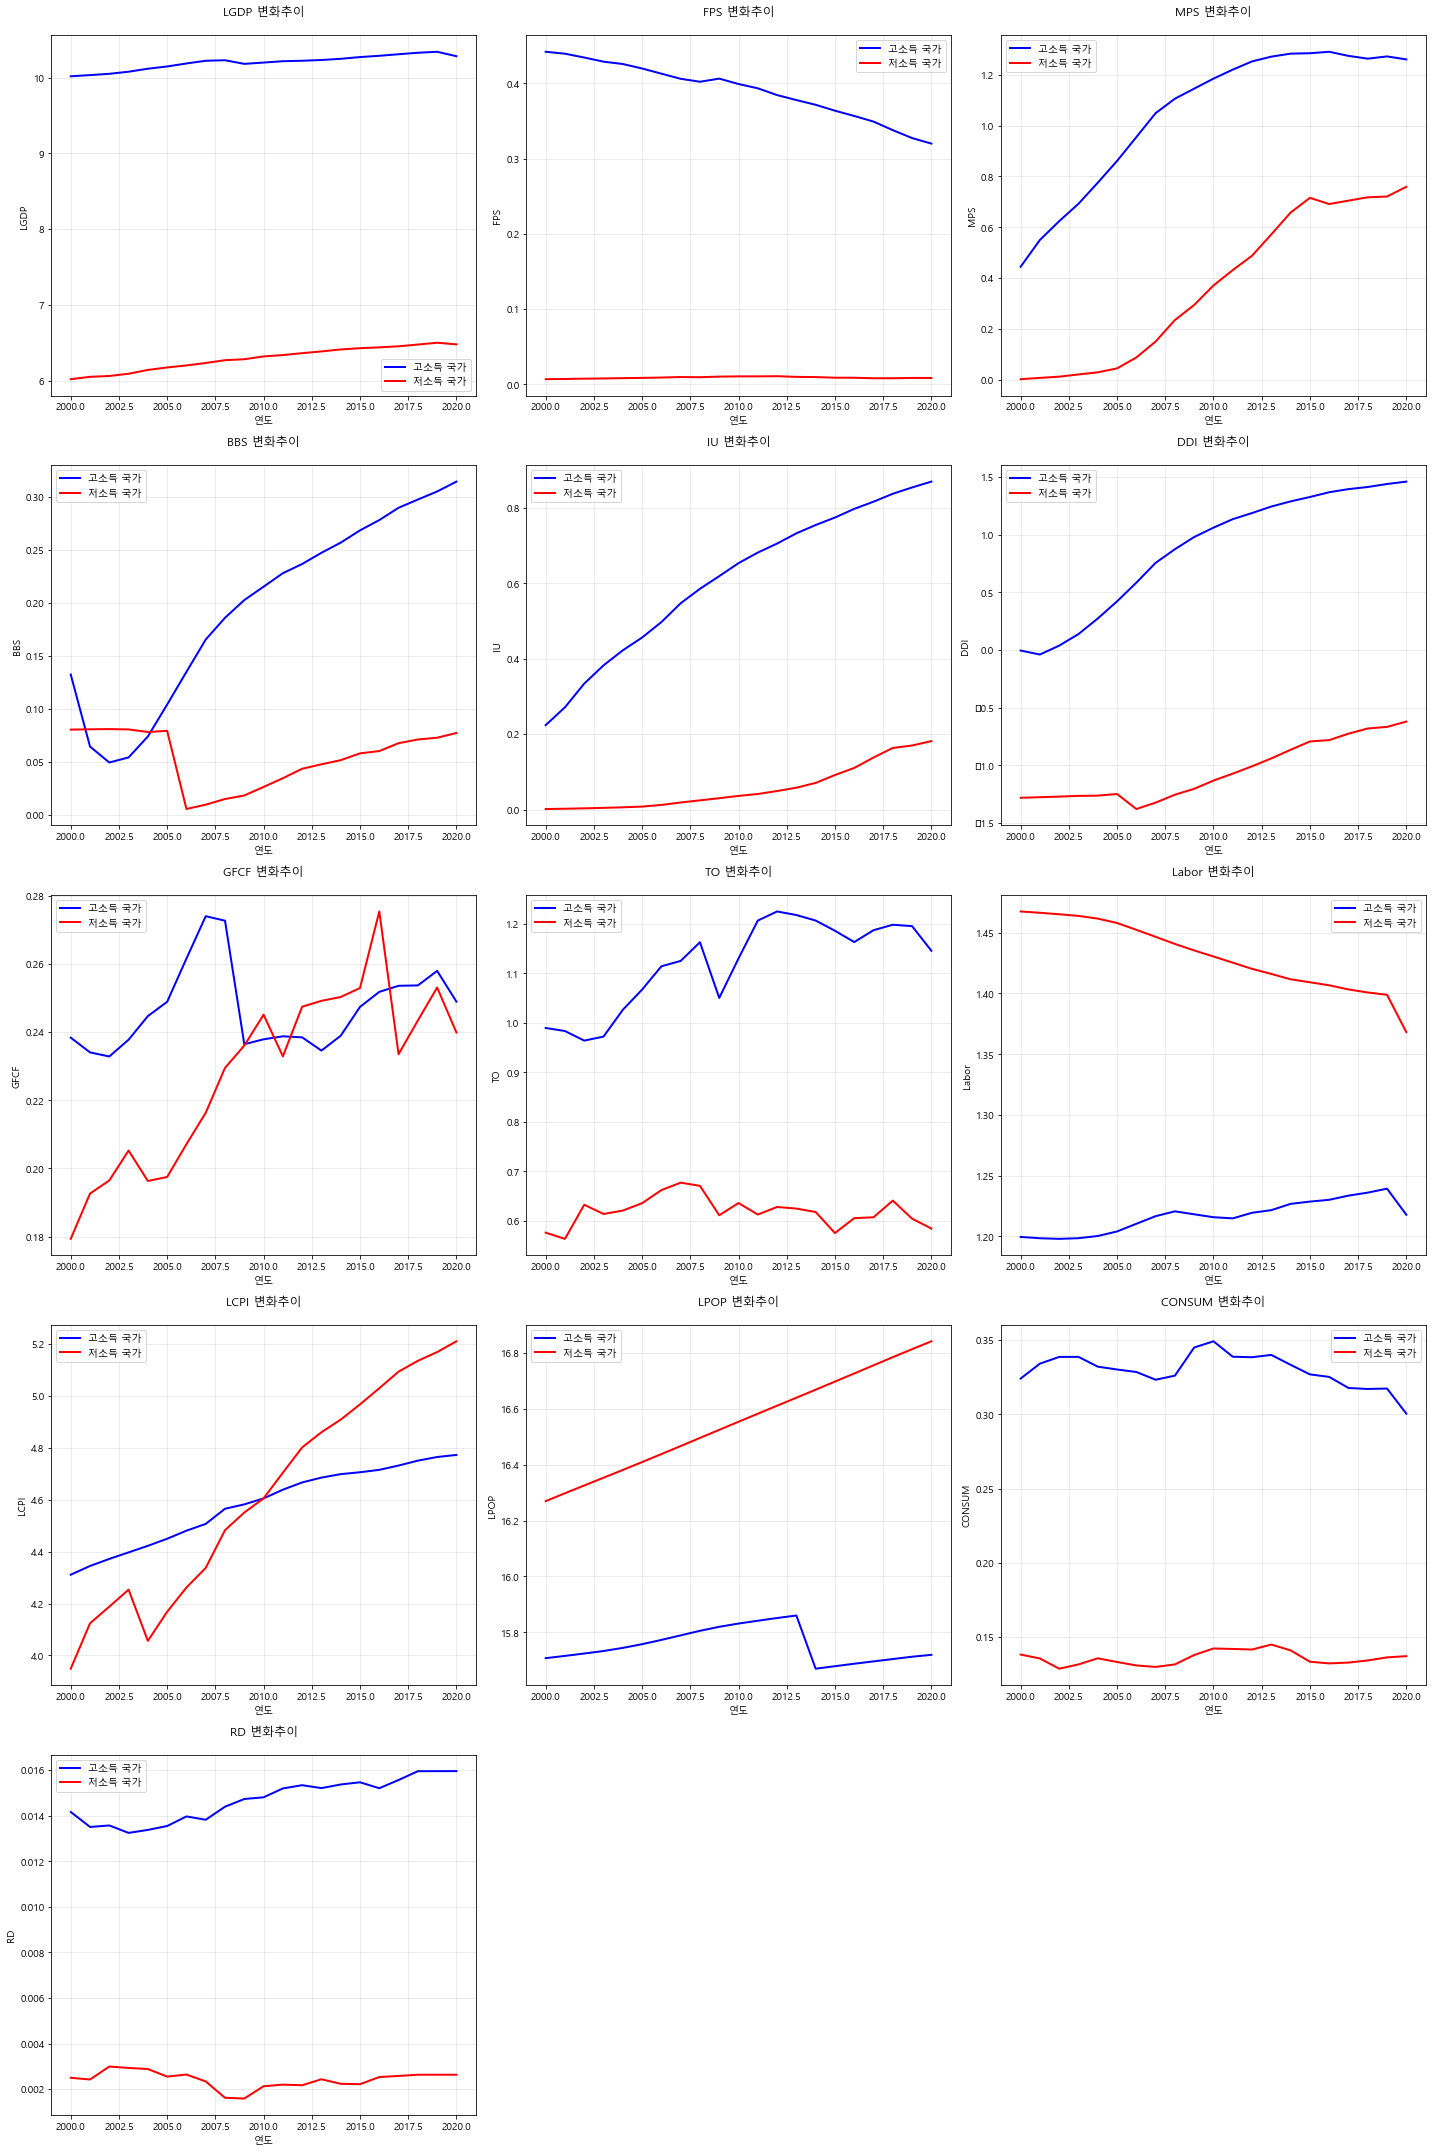

In [15]:
high_income = df[df['INCOME']==1]
low_income = df[df['INCOME']==4]

# 수치형 변수 선택
numeric_cols = df.select_dtypes(include = 'number').columns
numeric_cols = [col for col in numeric_cols if col not in ['Year ', 'id', 'INCOME']]

#서브플롯 생성
plt.figure(figsize=(20,30))

for idx, col in enumerate(numeric_cols,1):
    plt.subplot(5,3,idx)

    #고소득 국가 평균
    high_yearly_mean = high_income.groupby("Year ")[col].mean()
    plt.plot(high_yearly_mean.index, high_yearly_mean.values,
             label = '고소득 국가', color='blue', linewidth=2)
    
    #저소득 국가 평균
    low_yearly_mean = low_income.groupby('Year ')[col].mean()
    plt.plot(low_yearly_mean.index, low_yearly_mean.values,
             label='저소득 국가', color = 'red', linewidth=2)
    
    plt.title(f'{col} 변화추이', fontsize=12, pad=20)
    plt.xlabel('연도', fontsize=10)
    plt.ylabel(col, fontsize=10)
    plt.grid(True, alpha=0.3)
    plt.legend()

plt.tight_layout()
plt.show()

### 각 국가별 DDI(디지털화 진행) 그래프

In [16]:
" 각 국가별 DDI 그래프"

plt.figure(figsize=(15, 6))
country_ddi_mean = df.groupby('Country')['DDI'].mean().sort_values(ascending=False)
top_20_countries = country_ddi_mean.head(20)

<Figure size 1080x432 with 0 Axes>

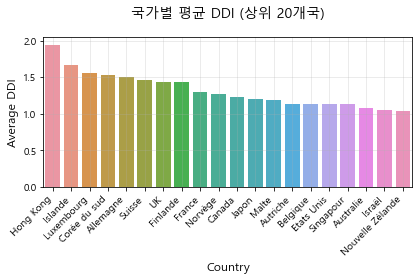

In [17]:
# 막대 그래프 생성
sns.barplot(x=top_20_countries.index, y=top_20_countries.values)
plt.title('국가별 평균 DDI (상위 20개국)', fontsize=14, pad=20)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Average DDI', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

- 상위권 국가들은 대부분 경제적으로 선진국이며, 디지털 인프라와 기술 발전이 잘 이루어진 지역임.
- 아시아와 유럽이 DDI 상위 국가에 다수 포함되어 있으며, 이는 디지털화가 지역별로 균등하게 발전했음을 보여줌.

### 인구와 통신 기술 발전 간 산점도 분석

In [21]:
# 서브플롯으로 4개의 산점도를 한번에 표시
plt.figure(figsize=(20, 15))

# 통신 관련 지표들
telecom_indicators = [
    'FPS',
    'MPS',
    'BBS',
    'IU'
]

<Figure size 1440x1080 with 0 Axes>

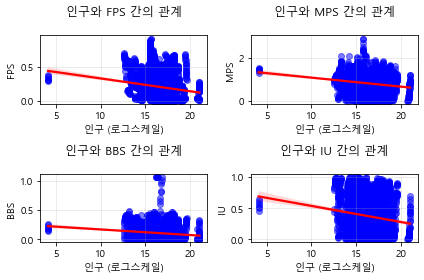

In [22]:
# 각 지표별 산점도 및 회귀선 그리기
for i, indicator in enumerate(telecom_indicators, 1):
    plt.subplot(2, 2, i)
    
    # 산점도 그리기
    sns.regplot(data=df, 
                x='LPOP', 
                y=indicator,
                scatter_kws={'alpha':0.5, 'color':'blue'},
                line_kws={'color': 'red'})
    
    plt.title(f'인구와 {indicator} 간의 관계', fontsize=12, pad=20)
    plt.xlabel('인구 (로그스케일)', fontsize=10)
    plt.ylabel(indicator, fontsize=10)
    plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

전체적으로 감소하는 경향은 아마도 저소득 국가가 포함되기 때문일거라고 판단하고 소득 구간별로 다시 분석 진행

### INCOME 별 인구와 통신기술간 관계 산점도

In [24]:
# 인구 로그스케일 5 이하 데이터 제외
filtered_df = df[df['LPOP'] > 5]

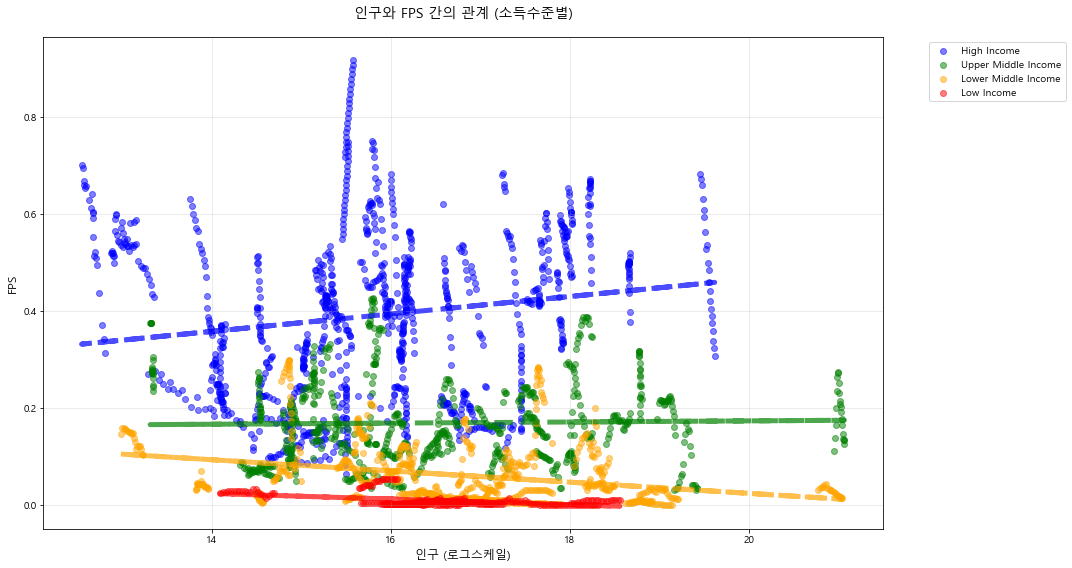

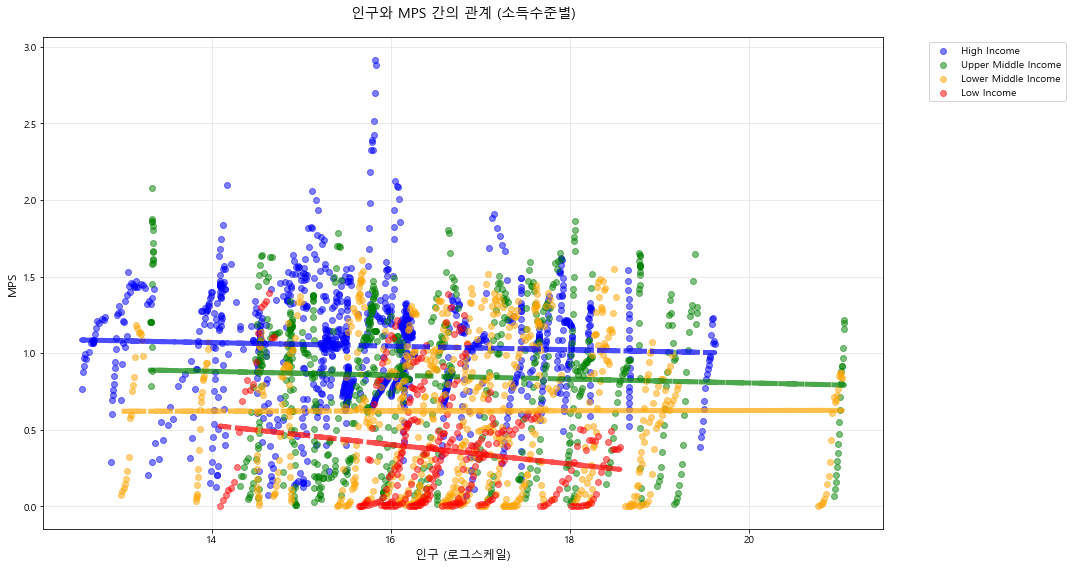

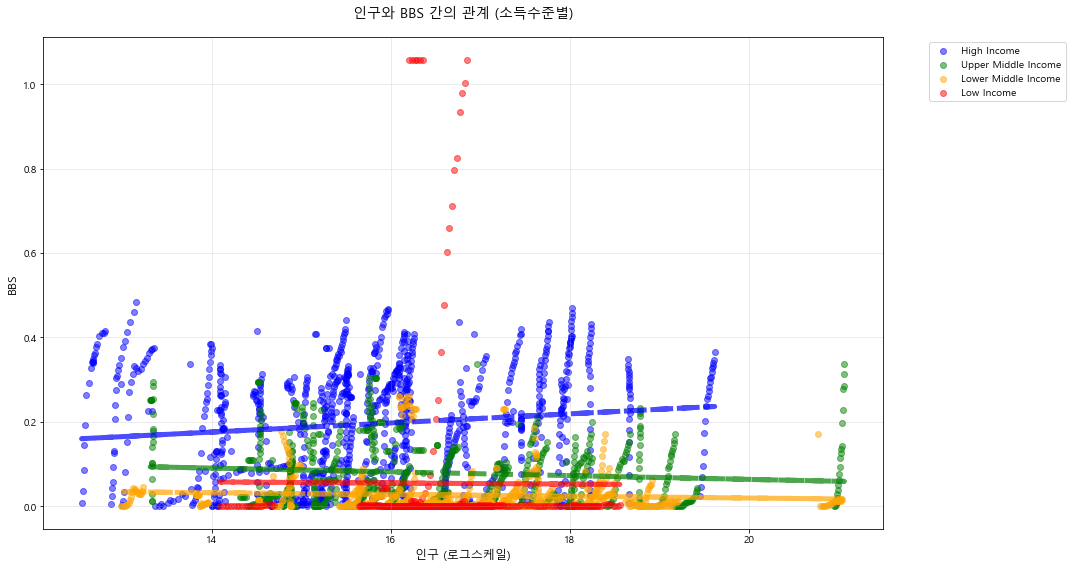

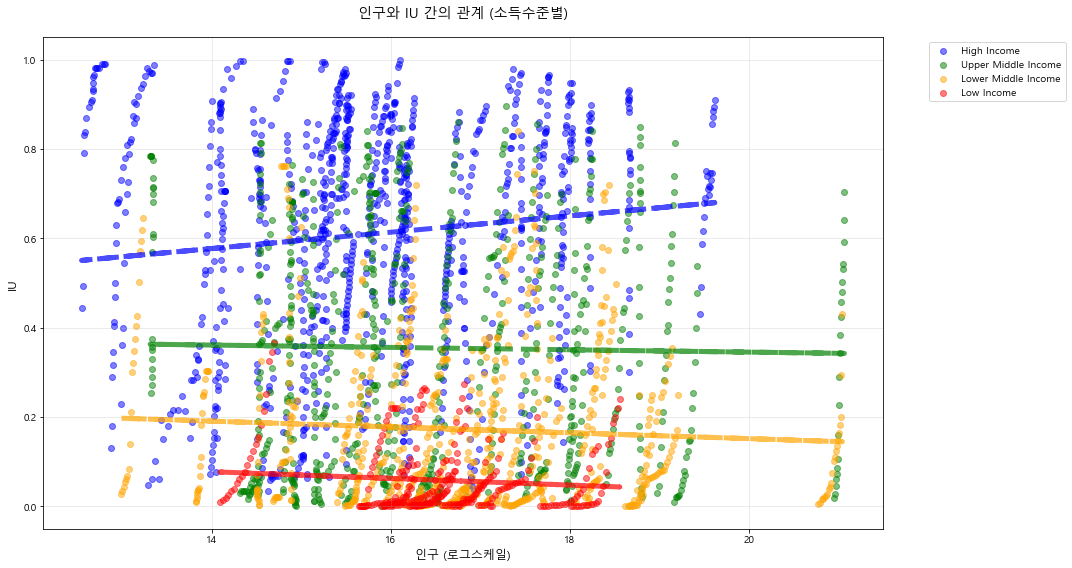

In [26]:
# 각 지표별로 별도의 그래프 생성
for indicator in telecom_indicators:
    plt.figure(figsize=(15, 8))
    
    # INCOME별로 다른 색상으로 산점도 그리기
    for income in filtered_df['INCOME'].unique():
        income_data = filtered_df[filtered_df['INCOME'] == income]
        
        # 소득 수준별 레이블 설정
        if income == 1:
            label = 'High Income'
            color = 'blue'
        elif income == 2:
            label = 'Upper Middle Income'
            color = 'green'
        elif income == 3:
            label = 'Lower Middle Income'
            color = 'orange'
        else:
            label = 'Low Income'
            color = 'red'
            
        # 산점도 그리기
        plt.scatter(income_data['LPOP'], 
                   income_data[indicator],
                   alpha=0.5,
                   color=color,
                   label=label)
        
        # 회귀선 추가 (소득 그룹별)
        z = np.polyfit(income_data['LPOP'], 
                      income_data[indicator], 1)
        p = np.poly1d(z)
        plt.plot(income_data['LPOP'],
                p(income_data['LPOP']),
                color=color,
                linestyle='--',
                alpha=0.7,
                linewidth=5)
    
    plt.title(f'인구와 {indicator} 간의 관계 (소득수준별)', fontsize=14, pad=20)
    plt.xlabel('인구 (로그스케일)', fontsize=12)
    plt.ylabel(indicator, fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

1. 고소득 국가:
- 인구가 많을수록 통신 인프라도 좋은 경향을 보이며, 디지털화 수준이 향상됨.
- 이는 경제적 여유와 디지털 인프라의 지속적인 확충 덕분.
2. 저소득 국가:
- 인구가 많을수록 통신 인프라 수준이 떨어지는 경향을 보이며, 디지털 접근성이 심각하게 제한됨.
- 이는 경제적 제약, 도시-농촌 격차, 인프라 확충 부족 때문.

### Plotly 라이브러리 를 활용한 시각화

In [28]:
# 디지털 지표들 간의 상관관계 버블차트
fig = px.scatter(df, 
    x='IU', 
    y='MPS',
    size='BBS',
    color='INCOME',
    hover_name='Country',
    animation_frame='Year ',  # 공백 주의
    title='디지털 지표간 관계 분석'
)
fig.show()

- 소득이 높은 국가에서는 2000년대부터 비교적 높은 인터넷과 모바일 사용량을 보이고 있으며, 시간이 지나면서 인터넷과 모바일 사용량이 일정하게 증가하는 추세를 보인다.

- 소득이 낮은 국가에서는 인터넷이 등장하던 2000년에는 거의 0에 수렴하며 시간이 지나면서 사용량이 증가하지만, 인터넷 사용량보다 모바일의 사용량이 더 크게 증가하는 경향을 보인다.

*유선 인터넷은 광케이블 등 물리적 인프라 구축이 필요한 반면, 모바일은 기지국 중심의 무선 네트워크로 구축이 더 용이*

### 국가별 디지털화 지도 시각화

In [29]:
# choropleth : 지도 시각화
fig = px.choropleth(df, 
    locations='Country',
    locationmode='country names',
    color='DDI',
    hover_name='Country',
    animation_frame='Year ',
    title='세계 디지털화 지도',
    color_continuous_scale='Viridis'
)
fig.show()

- 북미와 유럽은 디지털화가 시간이 지나면서 가장 높게 나타난다.

- 중동과 동유럽, 북아프리카와 남미에서는 비교적 준수한 디지털화를 이루어내고 있다.

- 동남아시아와 아프리카 지역에서는 시간이 지나도 디지털화가 0근처이거나 음의 계수를 보여주고 있다.

### 변수간 산점도 시각화

In [32]:
# scatter_matrix 실행
fig = px.scatter_matrix(df,
    dimensions=['DDI', 'LGDP', 'GFCF', 'RD'],
    color='INCOME',
    hover_name='Country',
    title='디지털화와 경제 지표 간 관계'
)
fig.show()

- 연구개발비 와 GDP : GDP가 높은 국가일수록 연구개발비가 높아진다. 특히 GDP가 높은국가중 중동국가들은 연구개발비가 낮으며 유럽과 아시아의 경우 연구개발비가 높게 나타난다.

- 고정자본형성총액(GFCF)이 높은 국가일수록 비교적 디지털화가 낮고, GFCF가 낮은 국가가 디지털화가 높다는것을 볼수있다.

- 소득이 높은국각는 연구개발비가 높아야 디지털화도 높지만, 저소득 국가의 경우 디지털화가 높더라도 연구개발비가 높지가 않다. 이는 저소득국가는 연구개발을 통해서 디지털화를 이루어낸것이 아닌 고소득국가의 연구개발 성과의 낙수효과를 통해 디지털화를 이루어낸다는 것을 유추할수있다.